In [3]:
import pandas as pd
import matplotlib as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [39]:
"""Load Data"""
path = 'Data\preliminary_data.xlsx'

df = pd.read_excel(path)
df.head()

,Microphone_number,0degrees,30degrees,45degrees,60degrees,90degrees,contrarot
0,1,68.671226,68.304512,68.543622,68.106036,68.929154,68.771152
1,2,68.291746,67.988290,67.996203,67.484770,68.228904,68.385523
2,3,67.938657,67.704007,67.414424,66.819543,67.392446,68.039185
3,4,67.638066,67.406729,66.814551,66.113560,66.418116,67.760692
4,5,67.438890,67.148651,66.264304,65.454912,65.353170,67.562351


In [92]:
df_polar = df.iloc[0:23,:]
df_azimuthal = df.iloc[23:,:]
df_azimuthal.reset_index

<bound method DataFrame.reset_index of     Microphone_number   0degrees  30degrees  45degrees  60degrees  90degrees  \
23                 24  68.478399  66.079783  64.249625  62.444463  64.574795   
24                 25  68.580297  66.185987  64.396608  62.490598  64.490343   
25                 26  68.694467  66.280668  64.612618  62.574343  64.174449   
26                 27  68.772893  66.508744  64.883221  62.665237  63.743360   
27                 28  68.845160  66.743423  65.223280  63.004286  63.441083   
28                 29  68.898324  66.924174  65.527131  63.387430  63.261455   
29                 30  68.955798  67.109873  65.715250  63.568965  63.034589   
30                 31  69.033848  67.327943  65.880292  63.747011  62.698958   
31                 32  69.094212  67.563492  66.023838  64.102103  62.445046   
32                 33  69.128602  67.792023  66.193650  64.479677  62.426674   
33                 34  69.107141  67.926038  66.405442  64.809419  62.311426   
3

df_polar.head(), df_polar['Microphone_number']

possible features = [Microphone_degree,	DB,	degree,	distance_from_blade, distance_from_blade_2,		Thrust_blade_1, Thrust_blade_2]

In [93]:
def azimuthal_microphone_adapt(row):
    row.Microphone_number = row.Microphone_number - 23
    return row
def microphone_number_to_angle(row):
    row.Microphone_number = row.Microphone_number - 1
    row.Microphone_number = row.Microphone_number * 5
    row.Microphone_number = row.Microphone_number + 40
    return row

df_polar = df_polar.apply(microphone_number_to_angle, axis = 'columns')
df_polar.head()

,Microphone_number,0degrees,30degrees,45degrees,60degrees,90degrees,contrarot
0,40.0,68.671226,68.304512,68.543622,68.106036,68.929154,68.771152
1,45.0,68.291746,67.988290,67.996203,67.484770,68.228904,68.385523
2,50.0,67.938657,67.704007,67.414424,66.819543,67.392446,68.039185
3,55.0,67.638066,67.406729,66.814551,66.113560,66.418116,67.760692
4,60.0,67.438890,67.148651,66.264304,65.454912,65.353170,67.562351


In [86]:
df_polar.Microphone_number[22]

150.0

In [94]:
df_azimuthal = df_azimuthal.apply(azimuthal_microphone_adapt, axis = 'columns')
df_azimuthal = df_azimuthal.apply(microphone_number_to_angle, axis = 'columns')
df_azimuthal.Microphone_number[45]

150.0

<AxesSubplot:ylabel='Density'>

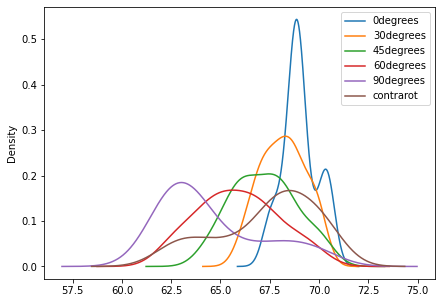

In [29]:
"""Visualize"""
# Plot distribution of sound production by angle
#df.groupby('Angle, in degrees,º')['Sound, in decibels, dB'].plot(kind='kde')
df['0degrees'].plot(kind='kde',legend=True, figsize= (7,5))
df['30degrees'].plot(kind='kde',legend=True)
df['45degrees'].plot(kind='kde',legend=True)
df['60degrees'].plot(kind='kde',legend=True)
df['90degrees'].plot(kind='kde',legend=True)
df['contrarot'].plot(kind='kde',legend=True)

# Add x-axis label
#plt.xlabel('Friction Lower Bound')


In [43]:
"""Scaling data"""
scaler = preprocessing.StandardScaler().fit(df)
Xs = scaler.transform(df)

""" Unscaling Data

scaled = scaler.inverse_transform(scaled)
print(scaled)
"""

' Unscaling Data\n\nscaled = scaler.inverse_transform(scaled)\nprint(scaled)\n'